# 09. Random Forest Model

**Mô hình:** Random Forest Regression

**Thư viện:** sklearn.ensemble.RandomForestRegressor

**Metrics:** RMSFE, MAPE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:

train_path = '../data/processed/train_clean.csv'
test_path = '../data/processed/test_clean.csv'

train_df = pd.read_csv(train_path, index_col=0, parse_dates=True)
test_df = pd.read_csv(test_path, index_col=0, parse_dates=True)

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

TARGET_COL = 'Core CPI' 
X_train = train_df.drop(columns=[TARGET_COL])
y_train = train_df[TARGET_COL]

X_test = test_df.drop(columns=[TARGET_COL])
y_test = test_df[TARGET_COL]

print("Dữ liệu đã sẵn sàng!")

Train shape: (112, 190)
Test shape: (28, 190)
Dữ liệu đã sẵn sàng!


In [3]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],    
    'max_depth': [5, 10, 20],     
    'min_samples_split': [2, 5],
    'max_features': ['sqrt', 'log2'] 
}

tscv = TimeSeriesSplit(n_splits=5)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"\nBest Params: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


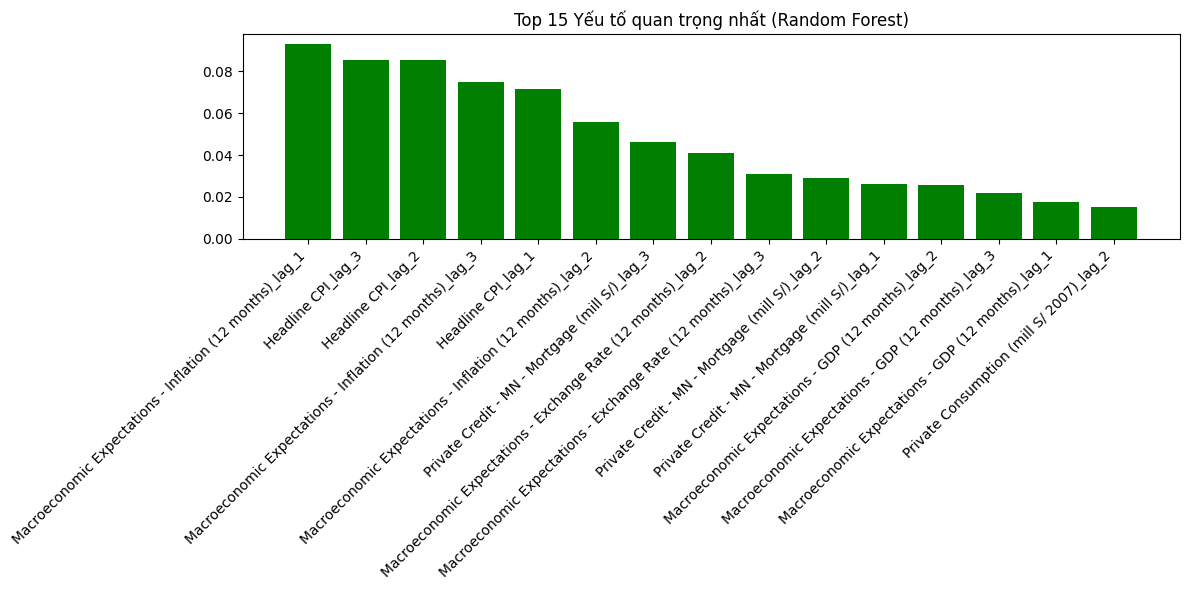

In [4]:

importances = best_rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1] 

top_n = 15
plt.figure(figsize=(12, 6))
plt.title("Top 15 Yếu tố quan trọng nhất (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align="center", color='green')
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

RMSE: 0.3131
MAPE: 46.10%


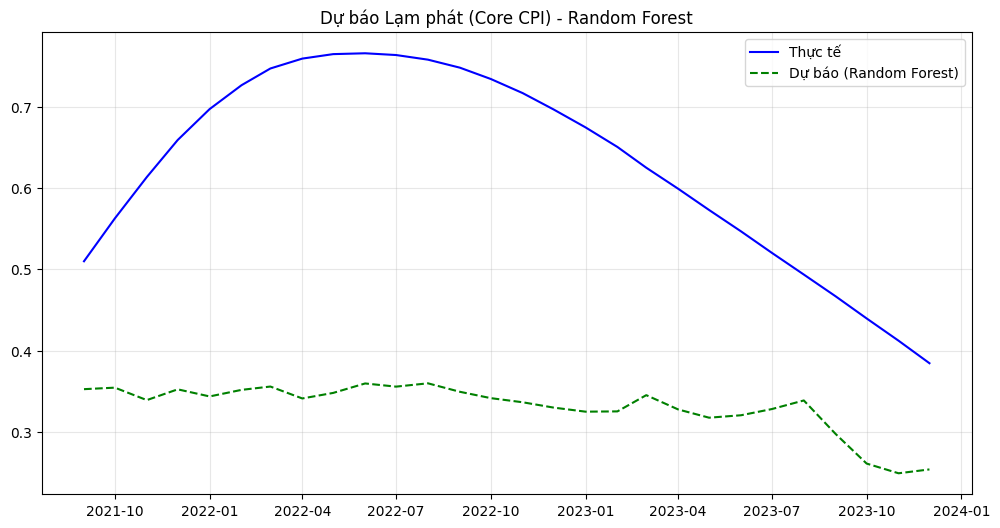

Đã lưu kết quả RF.


In [5]:
y_pred_rf = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2%}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Thực tế', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Dự báo (Random Forest)', color='green', linestyle='--')
plt.title('Dự báo Lạm phát (Core CPI) - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

pd.DataFrame({'Actual': y_test, 'Predicted_RF': y_pred_rf}, index=y_test.index).to_csv('../results/tables/rf_predictions.csv')
print("Đã lưu kết quả RF.")